In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nengo
import scipy
import pandas as pd
from NEF_WM import *
palette = sns.color_palette('tab10')
sns.set_palette(palette)
sns.set(context='paper', style='white', font="cmr10", font_scale=1.2)
plt.rcParams['axes.formatter.use_mathtext'] = True

In [2]:
human = pd.read_pickle("data/carrabin.pkl")

In [316]:
sid = 1
trial = 7
seed = trial
T = 1
stimuli = human.query("sid==@sid & trial==@trial")['color'].to_numpy()

n_neurons = 100
n_memory = 100
n_error = 100
syn_ff = 0.01
syn_fb = 0.1
syn_probe = 0.01
dt = 0.001
W = 0.5
w_ff = 0.3

stim_func = lambda t: stimuli[int(t/T)]
weight_func = lambda t: W #/ int(t) if int(t)>0 else 1
network = nengo.Network(seed=seed)

with network:
    stim_node = nengo.Node(stim_func)
    weight_node = nengo.Node(weight_func)
    stim = nengo.Ensemble(n_neurons, 1)
    weight = nengo.Ensemble(n_neurons, 1, radius=W)
    error = nengo.networks.Product(n_error, 1)
    memory = nengo.Ensemble(n_memory, 1)
    nengo.Connection(stim_node, stim)
    nengo.Connection(weight_node, weight)
    nengo.Connection(stim, error.input_a, synapse=syn_ff)
    nengo.Connection(memory, error.input_a, synapse=syn_ff, transform=-1)
    nengo.Connection(weight, error.input_b, synapse=syn_ff)
    nengo.Connection(error.output, memory, synapse=syn_ff, transform=w_ff)
    nengo.Connection(memory, memory, synapse=syn_fb)
    probe_stim = nengo.Probe(stim, synapse=syn_probe)
    probe_error = nengo.Probe(error.output, synapse=syn_probe)
    probe_weight = nengo.Probe(weight, synapse=syn_probe)
    probe_memory = nengo.Probe(memory, synapse=syn_probe)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

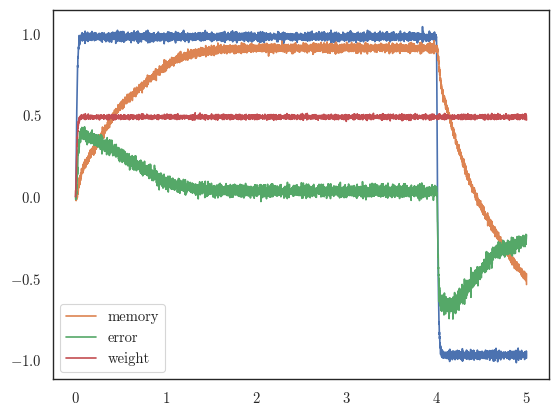

In [317]:
with nengo.Simulator(network, dt=dt) as sim:
    sim.run(5*T-dt)

fig, ax = plt.subplots()
ax.plot(sim.trange(), sim.data[probe_stim])
ax.plot(sim.trange(), sim.data[probe_memory], label='memory')
ax.plot(sim.trange(), sim.data[probe_error], label='error')
ax.plot(sim.trange(), sim.data[probe_weight], label='weight')
ax.legend()